Article : https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

In [ ]:
import pandas as pd
import numpy as np

#dataset
from sklearn.datasets import make_blobs

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Creating an array with 3 clusters in 3dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

#Standardizing the data
X = StandardScaler().fit_transform(X)

#Prerpairing the array in a DF
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


In [ ]:
#Visualize
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x0', y='x1', z='x2', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

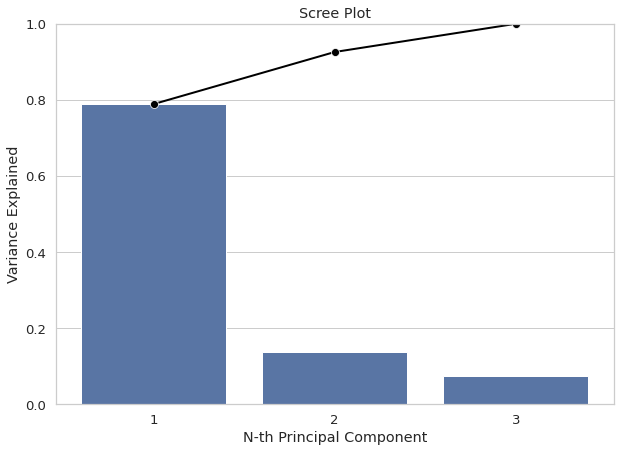

In [ ]:
#Performing PCA
pca=PCA()
_=pca.fit_transform(df[col_name])
PC_components=np.arange(pca.n_components_)+1

#ScreePlot
_= sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title("Scree Plot")
plt.xlabel("N-th Principal Component")
plt.ylabel("Variance Explained")
plt.ylim(0,1)
plt.show()

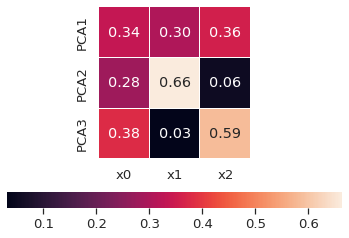

In [ ]:
#FeatureWeight
_=sns.heatmap(pca.components_**2,
             yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
             xticklabels=list(col_name),
             annot=True,
             fmt=".2f",
             square=True,
             linewidth=0.05,
             cbar_kws={"orientation": "horizontal"})

In [ ]:
#PErformPCA
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convert back to DF for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

,PC1,PC2,label
0,1.750435,-0.041716,2
1,2.255957,-0.226133,2
2,-1.058243,0.998596,1
3,-1.165212,-0.799110,0
4,1.478118,-0.034766,2


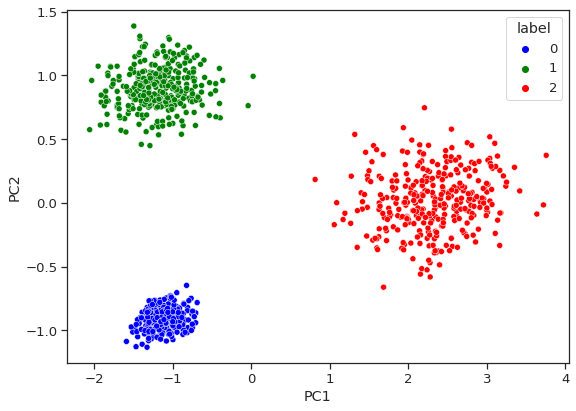

In [ ]:
#PlotPrincipalComponent
_=sns.set(style="ticks",font_scale=1.2)
fig,ax=plt.subplots(figsize=(9,6.5))
_=sns.scatterplot(data=df_pca,x="PC1", y="PC2",hue=df_pca["label"], palette=["blue","green", "red"])